In [1]:
# Data manipulation

# for dataframe for up to 2D data structure
import dask.array as da
# import dask.bag as db
import dask.dataframe as dd
from graphviz import Digraph
import numpy as np
import pandas as pd
import os
import config 

"""
# for multi-dimensional data structure analytics 
# can work with pandas for better multi-dimensional data structure  
"""
import numpy as np   

"""
Python Library for Low-Code Data Visualization 
"""
import seaborn as sns
import matplotlib.pyplot as plt


# to display important warning messages from Python
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\.conda\envs\base-geemap-mamba-v2\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
# Dask dashboard for us to learn more about the memory plot management of the data by dask 
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 31.63 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55822,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 31.63 GiB
Comm: tcp://127.0.0.1:55848,Total threads: 4
Dashboard: http://127.0.0.1:55851/status,Memory: 7.91 GiB
Nanny: tcp://127.0.0.1:55825,


In [45]:
# Construct the full path to the CSV file
pricecatcher_csv_path = os.path.join(config.DATA_HOME_PATH, config.CSV_SUBDIRECTORY, config.DATASET_PRICECATCHER)

# Check if the file exists
if os.path.exists(pricecatcher_csv_path):
    # Read the CSV file using pandas
    dask_pricecatcher_df = dd.read_csv(pricecatcher_csv_path)
    print("CSV file has been loaded successfully!")
    print("") 
    print("Top 5 rows of the data:")
    print(dask_pricecatcher_df.head())  # Display the first few rows of the dataframe
    print("") 
    print("General Statistics of the data:")
    print(dask_pricecatcher_df.describe().compute().round(2)) # Display the general statistics of the dataframe
    print("")
    print("Number of null data of this dataset")
    print(dask_pricecatcher_df.isnull().sum().compute())# Display the number of null data in the dataframe
else:
    print(f"Error: The file {pricecatcher_csv_path} does not exist.")

CSV file has been loaded successfully!

Top 5 rows of the data:
         date  premise_code  item_code  price
0  2022-01-01             2          1    9.1
1  2022-01-01             2          9   36.0
2  2022-01-01             2         14   24.0
3  2022-01-01             2         16    4.3
4  2022-01-01             2         18    4.5

General Statistics of the data:
       premise_code    item_code        price
count   50666976.00  50666976.00  50666976.00
mean       11308.92      1004.21        13.28
std         7051.37       724.16        12.54
min           -1.00        -1.00         0.01
25%         4203.00       152.00         5.50
50%        13715.00      1183.00         9.99
75%        18010.00      1591.00        17.90
max        20900.00      2020.00      3599.00

Number of null data of this dataset
date            0
premise_code    0
item_code       0
price           0
dtype: int64


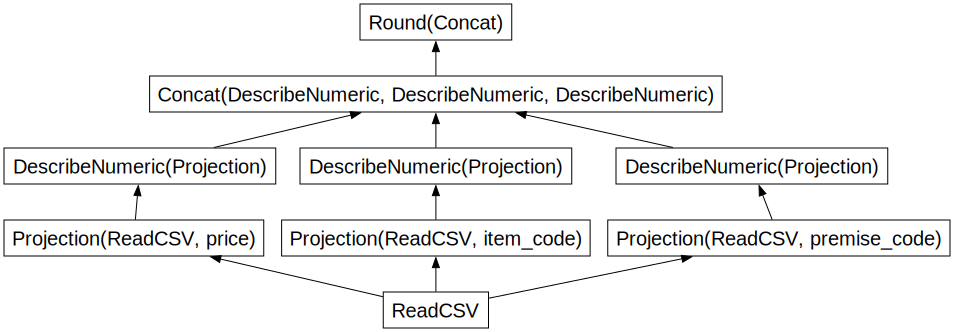

In [46]:
dask_pricecatcher_df.describe().round(2).visualize()

In [47]:
# Load the other CSV file into a Dask DataFrame
filtered_fuelprice_csv_path = os.path.join(config.DATA_HOME_PATH, config.CSV_SUBDIRECTORY, config.DATASET_FUEL_PRICE_FILTERED)

# Check if the file exists
if os.path.exists(filtered_fuelprice_csv_path):
    # Read the CSV file using pandas
    filtered_fuelprice = dd.read_csv(filtered_fuelprice_csv_path)
    print("CSV file has been loaded successfully!")
    print(filtered_fuelprice.head())  # Display the first few rows of the dataframe
else:
    print(f"Error: The file {filtered_fuelprice_csv_path} does not exist.")

CSV file has been loaded successfully!
         date  ron95_price_level  ron97_price_level  diesel_price_level
0  2022-01-06               2.05               3.03                2.15
1  2022-01-13               2.05               3.07                2.15
2  2022-01-20               2.05               3.07                2.15
3  2022-01-27               2.05               3.12                2.15
4  2022-02-03               2.05               3.12                2.15


In [48]:
merged_df = dask_pricecatcher_df.merge(filtered_fuelprice, on=['date'])

In [75]:
merged_df.visualize()

NameError: name 'merged_df' is not defined

In [49]:
merged_df.compute().round(2)

,date,premise_code,item_code,price,ron95_price_level,ron97_price_level,diesel_price_level
0,2022-01-06,2,1,9.10,2.05,3.03,2.15
1,2022-01-06,2,9,36.00,2.05,3.03,2.15
2,2022-01-06,2,14,24.00,2.05,3.03,2.15
3,2022-01-06,2,16,4.00,2.05,3.03,2.15
4,2022-01-06,2,18,4.50,2.05,3.03,2.15
...,...,...,...,...,...,...,...
217922,2023-10-12,20895,1939,29.49,2.05,3.37,2.15
217923,2023-10-12,20895,1941,13.30,2.05,3.37,2.15
217924,2023-10-12,20895,1942,27.49,2.05,3.37,2.15
217925,2023-10-12,20895,1945,0.79,2.05,3.37,2.15


In [50]:
columns_to_drop = ['ron95_price_level', 'diesel_price_level']
merged_df = merged_df.drop(columns_to_drop, axis=1)
merged_df.describe().compute().round(3)

,premise_code,item_code,price,ron97_price_level
count,6095859.000,6095859.000,6095859.000,6095859.000
mean,11138.017,975.924,13.511,3.679
std,7070.873,735.683,12.434,0.481
min,-1.000,1.000,0.200,3.030
25%,5823.000,271.000,6.500,3.350
50%,15655.000,1153.000,10.990,3.370
75%,18100.000,1604.000,18.000,3.950
max,20895.000,2020.000,1550.000,4.840


In [51]:
# Load the other CSV file into a Dask DataFrame
lookup_item_csv_path = os.path.join(config.DATA_HOME_PATH, config.CSV_SUBDIRECTORY, config.DATASET_LOOKUP_ITEM)

# Check if the file exists
if os.path.exists(lookup_item_csv_path):
    # Read the CSV file using pandas
    lookup_item = dd.read_csv(lookup_item_csv_path)
    print("CSV file has been loaded successfully!")
    print("") 
    print("Top 5 rows of the data:")
    print(lookup_item.head())  # Display the first few rows of the dataframe
    print("") 
    print("General Statistics of the data:")
    print(lookup_item.describe().compute().round(3)) # Display the general statistics of the dataframe
    print("")
    print("Number of null data of this dataset")
    print(lookup_item.isnull().sum().compute())# Display the number of null data in the dataframe
else:
    print(f"Error: The file {lookup_item_csv_path} does not exist.")
    

CSV file has been loaded successfully!

Top 5 rows of the data:
   item_code                                               item unit  \
0         -1                                                NaN  NaN   
1          1                             AYAM BERSIH - STANDARD  1kg   
2          2                                AYAM BERSIH - SUPER  1kg   
3          3                                         AYAM HIDUP  1kg   
4          9  DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...  1kg   

       item_group item_category  
0             NaN           NaN  
1  BARANGAN SEGAR          AYAM  
2  BARANGAN SEGAR          AYAM  
3  BARANGAN SEGAR          AYAM  
4  BARANGAN SEGAR        DAGING  

General Statistics of the data:
       item_code
count    757.000
mean    1299.593
std      615.208
min       -1.000
25%     1097.000
50%     1484.000
75%     1778.000
max     2020.000

Number of null data of this dataset
item_code        0
item             1
unit             1
item_group       1


In [52]:
lookup_item.compute().round(0)

,item_code,item,unit,item_group,item_category
0,-1,NaN,NaN,NaN,NaN
1,1,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
2,2,AYAM BERSIH - SUPER,1kg,BARANGAN SEGAR,AYAM
3,3,AYAM HIDUP,1kg,BARANGAN SEGAR,AYAM
4,9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING
...,...,...,...,...,...
752,2016,SABUN SERBUK FAB (PERFECT),680g,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
753,2017,DYNAMO POWER GEL (PERFECT CLEAN),2.6kg,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
754,2018,SABUN PENCUCI SUNLIGHT (LEMON),900ml,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
755,2019,NESCAFE 3 IN 1 ORIGINAL (AROMATIC & BALANCED),25 x 18g,MINUMAN,BAHAN-BAHAN MINUMAN


In [53]:
merged_df = merged_df.merge(lookup_item, on=['item_code'])

In [54]:
merged_df.compute()

,date,premise_code,item_code,price,ron97_price_level,item,unit,item_group,item_category
0,2022-01-06,2,1,9.10,3.03,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
1,2022-01-06,2,9,36.00,3.03,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING
2,2022-01-06,2,14,24.00,3.03,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),1kg,BARANGAN SEGAR,DAGING
3,2022-01-06,2,16,4.00,3.03,BETIK BIASA,1kg,BARANGAN SEGAR,BUAH-BUAHAN
4,2022-01-06,2,18,4.50,3.03,PISANG BERANGAN,1kg,BARANGAN SEGAR,BUAH-BUAHAN
...,...,...,...,...,...,...,...,...,...
217922,2023-10-12,20895,1939,29.49,3.37,MINYAK MASAK TULEN CAP SAJI,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
217923,2023-10-12,20895,1941,13.30,3.37,MINYAK MASAK TULEN CAP ALIF,2 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
217924,2023-10-12,20895,1942,27.49,3.37,MINYAK MASAK TULEN CAP ALIF,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
217925,2023-10-12,20895,1945,0.79,3.37,TAUHU (JENIS KERAS),sekeping,BARANGAN SEGAR,TAUHU DAN TEMPE


In [55]:
merged_df.describe().compute().round(3)

,premise_code,item_code,price,ron97_price_level
count,6095859.000,6095859.000,6095859.000,6095859.000
mean,11138.017,975.924,13.511,3.679
std,7070.873,735.683,12.434,0.481
min,-1.000,1.000,0.200,3.030
25%,5823.000,271.000,6.500,3.350
50%,15655.000,1153.000,10.990,3.370
75%,18100.000,1604.000,18.000,3.950
max,20895.000,2020.000,1550.000,4.840


In [56]:
# Load the other CSV file into a Dask DataFrame
geocoded_premise_csv_path = os.path.join(config.DATA_HOME_PATH, config.CSV_SUBDIRECTORY, config.DATASET_LOOKUP_PREMISES_GEOCODED)

# Check if the file exists
if os.path.exists(geocoded_premise_csv_path):
    # Read the CSV file using pandas
    geocoded_premise = dd.read_csv(geocoded_premise_csv_path)
    print("CSV file has been loaded successfully!")
    print("") 
    print("Top 5 rows of the data:")
    print(geocoded_premise.head())  # Display the first few rows of the dataframe
    print("") 
    print("General Statistics of the data:")
    print(geocoded_premise.describe().compute().round(3)) # Display the general statistics of the dataframe
    print("")
    print("Number of null data of this dataset")
    print(geocoded_premise.isnull().sum().compute())# Display the number of null data in the dataframe
else:
    print(f"Error: The file {geocoded_premise_csv_path} does not exist.")

CSV file has been loaded successfully!

Top 5 rows of the data:
   premise_code                            premise  \
0            -1                                NaN   
1             2                   PASAR BESAR IPOH   
2             3                   JUSCO AYER KEROH   
3             6  KEDAI RUNCIT TAFAZ MAJU PRESINT 9   
4             7   KEDAI RUNCIT SYAZ MAJU PRESINT 9   

                                             address  \
0                                                  ,   
1    JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK   
2  LOT 4991,MUKIM BUKIT BARU,75450 LEBUH AYER KER...   
3        NO.5, JALAN P9B/1,PRESINT 9,62250 PUTRAJAYA   
4        NO.5, JALAN P9E/1,PRESINT 9,62250 PUTRAJAYA   

               premise_type           state       district  latitude  \
0                       NaN             NaN            NaN       NaN   
1              Pasar Basah            Perak          Kinta  4.592759   
2  Pasar Raya / Supermarket          Melaka  Melaka Tengah

In [57]:
processed_df = merged_df.merge(geocoded_premise, on=['premise_code'])

In [58]:
processed_df.compute().round(0)

,date,premise_code,item_code,price,ron97_price_level,item,unit,item_group,item_category,premise,address,premise_type,state,district,latitude,longitude
0,2022-01-06,2,1,9.0,3.0,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,5.0,101.0
1,2022-01-06,2,9,36.0,3.0,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,5.0,101.0
2,2022-01-06,2,14,24.0,3.0,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),1kg,BARANGAN SEGAR,DAGING,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,5.0,101.0
3,2022-01-06,2,16,4.0,3.0,BETIK BIASA,1kg,BARANGAN SEGAR,BUAH-BUAHAN,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,5.0,101.0
4,2022-01-06,2,18,4.0,3.0,PISANG BERANGAN,1kg,BARANGAN SEGAR,BUAH-BUAHAN,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,5.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217922,2023-10-12,20895,1939,29.0,3.0,MINYAK MASAK TULEN CAP SAJI,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK,XR MART BANDAR,"XIRI (K.BERANG) SDN. BHD.,104-106 JALAN PETANI,",Pasar Raya / Supermarket,Terengganu,Kuala Terengganu,5.0,103.0
217923,2023-10-12,20895,1941,13.0,3.0,MINYAK MASAK TULEN CAP ALIF,2 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK,XR MART BANDAR,"XIRI (K.BERANG) SDN. BHD.,104-106 JALAN PETANI,",Pasar Raya / Supermarket,Terengganu,Kuala Terengganu,5.0,103.0
217924,2023-10-12,20895,1942,27.0,3.0,MINYAK MASAK TULEN CAP ALIF,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK,XR MART BANDAR,"XIRI (K.BERANG) SDN. BHD.,104-106 JALAN PETANI,",Pasar Raya / Supermarket,Terengganu,Kuala Terengganu,5.0,103.0
217925,2023-10-12,20895,1945,1.0,3.0,TAUHU (JENIS KERAS),sekeping,BARANGAN SEGAR,TAUHU DAN TEMPE,XR MART BANDAR,"XIRI (K.BERANG) SDN. BHD.,104-106 JALAN PETANI,",Pasar Raya / Supermarket,Terengganu,Kuala Terengganu,5.0,103.0


In [59]:
processed_df.describe(include='all').compute().round(3)

,date,premise_code,item_code,price,ron97_price_level,item,unit,item_group,item_category,premise,address,premise_type,state,district,latitude,longitude
unique,85,NaN,NaN,NaN,NaN,638,115,7,43,1587,1586,11,16,166,NaN,NaN
count,6095859,6095859.000,6095859.000,6095859.000,6095859.000,6095859,6095859,6095859,6095859,6095821,6095859,6095821,6095821,6095821,6095821.000,6095821.000
top,2023-04-20,NaN,NaN,NaN,NaN,MINYAK JAGUNG CAP DAISY,1kg,BARANGAN SEGAR,SAYUR-SAYURAN,MYDIN MALL,"BASEMENT 2, PUSAT PERDAGANGAN KUCHAI,NO.2, JAL...",Pasar Raya / Supermarket,W.P. Kuala Lumpur,Johor Bahru,NaN,NaN
freq,222827,NaN,NaN,NaN,NaN,80103,4469889,3997206,1818476,16615,11480,3107081,690860,190347,NaN,NaN
mean,NaN,11138.017,975.924,13.511,3.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.979,103.569
std,NaN,7070.873,735.683,12.434,0.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.609,4.644
min,NaN,-1.000,1.000,0.200,3.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.728,72.040
25%,NaN,5823.000,271.000,6.500,3.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.057,101.440
50%,NaN,15655.000,1153.000,10.990,3.370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.893,102.073
75%,NaN,18100.000,1604.000,18.000,3.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.391,103.352


In [60]:
processed_df.info()

<class 'dask_expr.DataFrame'>
Columns: 16 entries, date to longitude
dtypes: object(10), float64(4), int64(2)

In [61]:
processed_df.dtypes

date                  object
premise_code           int64
item_code              int64
price                float64
ron97_price_level    float64
item                  object
unit                  object
item_group            object
item_category         object
premise               object
address               object
premise_type          object
state                 object
district              object
latitude             float64
longitude            float64
dtype: object

In [62]:
# Load the data into a Dask array 
"""
In general, if you're working with a Dask DataFrame and you want to convert it to a Dask Array, it's recommended to use the to_dask_array method of the DataFrame. 
The from_array function is more general and can be used to create a Dask Array from any array-like object, but it may not handle Dask DataFrames as efficiently as the to_dask_array method.
"""
dask_array = processed_df.to_dask_array(lengths=True)
dask_array

dask.array<values, shape=(6095859, 16), dtype=object, chunksize=(490627, 16), chunktype=numpy.ndarray>

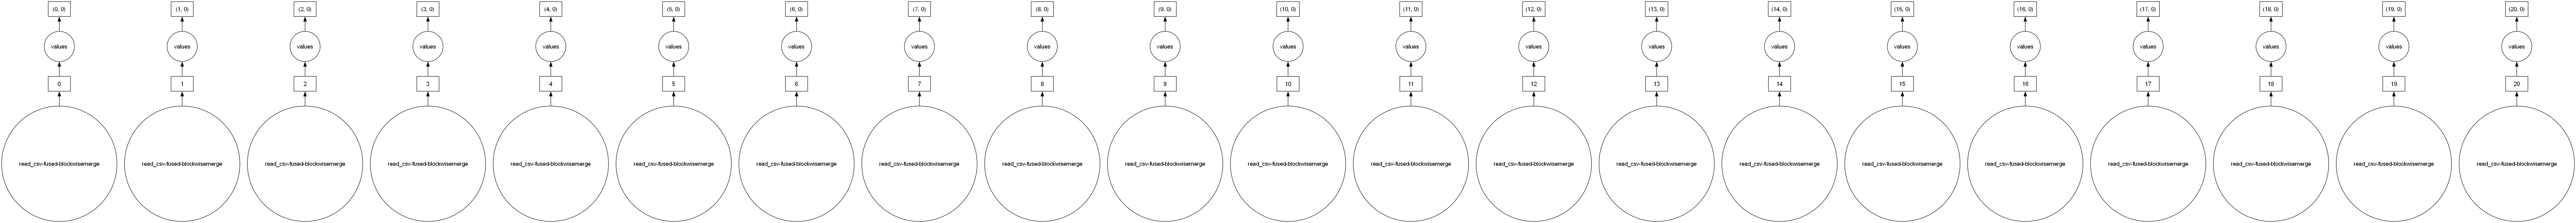

In [67]:
dask_array.visualize()

In [74]:
dask_array.array.rechunk().visualize()

AttributeError: 'Array' object has no attribute 'array'

In [65]:
import gc # to clear variable no longer needed

#el merged_df
#print(gc.collect())

del lookup_item
print(gc.collect())

del geocoded_premise
print(gc.collect())

del filtered_fuelprice
print(gc.collect())


29
0
0


In [69]:
dask_array.describe().compute()

AttributeError: 'Array' object has no attribute 'describe'

In [23]:
# To end the dask client
client.close()

In [9]:
df.describe()

,premise_code,item_code,price
count,5.066698e+07,5.066698e+07,5.066698e+07
mean,1.130892e+04,1.004211e+03,1.327749e+01
std,7.051369e+03,7.241577e+02,1.253935e+01
min,-1.000000e+00,-1.000000e+00,1.000000e-02
25%,3.904000e+03,1.240000e+02,5.000000e+00
50%,1.200000e+04,1.132000e+03,9.000000e+00
75%,1.783500e+04,1.573000e+03,1.679000e+01
max,2.090000e+04,2.020000e+03,3.599000e+03


In [11]:
# Helper function to use pandasql
pysqldf = lambda q: sqldf(q, globals())

# Example query to find rows with missing data in the 'latitude' or 'latitude' column 
query = """
SELECT COUNT(date) FROM df;
"""

total_record_data_df = pysqldf(query)
total_record_data_df

KeyboardInterrupt: 

In [14]:
import pandasql as ps

def process_with_pandasql(df, batch_size=100000):
    results = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i + batch_size]
        query = "SELECT COUNT(date) FROM batch"
        result = ps.sqldf(query, locals())
        results.append(result)
    return pd.concat(results)

In [15]:
df = process_with_pandasql(total_record_data_df)

NameError: name 'total_record_data_df' is not defined

In [13]:
# Example function to simulate deleting records in batches with status updates
def load_records_in_batches(df, batch_size=50000):
    total_records = df
    total_records = len(df)
    print(f"Total records initially: {total_records}")
    
    if total_records == 0:
        print("No records found. Exiting.")
        return df

    records_remaining = total_records
    batch_count = 0

    while records_remaining > 0:
        batch_count += 1
        # Simulate deletion by dropping the first batch_size number of rows
        df = df.iloc[batch_size:]
        records_remaining -= batch_size
        records_remaining = max(records_remaining, 0)  # Ensure it does not go negative
        print(f"Batch {batch_count}: Selected {batch_size} records. {records_remaining} records remaining.")
    
    print("All records have been processed.")
    return df

# Simulate deleting records in batches
df = load_records_in_batches(total_record_data_df)

# Since we don't actually drop tables, the DataFrame would simply be cleared or re-used.
print("Data processing complete.")


NameError: name 'total_record_data_df' is not defined

# Archive Code Repository
Trial and error code snippets that were not used in the final implementation are stored here.

In [3]:
# enable gc collect for garbage collection
# no needed, since Python’s garbage collection is automatic and efficient
# import gc

# gc.enable()
# gc.isenabled()
# gc.get_stats()
# del dask_df

In [ ]:
# """
# Strategy to further reduce memory usage during Dask data processing. 
# These strategies are not guaranteed to reduce memory usage in all cases, and the best strategy depends on the specifics of your data and computations.
# """
# import gc # to clear variable no longer needed 
# 
# # Use appropriate data types
# df['column1'] = df['column1'].astype('uint8')
# 
# # Perform some preprocessing steps
# df['column1'] = df['column1'].str.lower()  # Convert to lowercase
# df['column2'] = df['column2'].replace({0: 'No', 1: 'Yes'})  # Replace values
# 
# # Use Dask's persist method
# """
# The persist method allows you to keep the results of computations in memory. This can be useful if you're going to reuse the results of a computation multiple times.
# """
# df = df.persist()
# 
# # Compute the results
# df = df.compute()
# 
# # Clear variables that are no longer needed
# """
#  If you have variables that are no longer needed, you can delete them using the del statement and then call the gc.collect() method to free up memory.
# """
# del df
# gc.collect()
# 
# # Load the data into a Dask DataFrame again
# df = dd.read_csv('large_dataset.csv')
# 
# # Use Dask's repartition method
# """
# Use Dask's repartition method: If your Dask DataFrame has many partitions, you can reduce the number of partitions using the repartition method. This can reduce memory usage, but it can also increase computation time.
# """
# df = df.repartition(npartitions=10)
# 
# # Compute the results
# df = df.compute()
# 
# # Clear variables that are no longer needed
# del df
# gc.collect()